# Projet Machine Learning

In [1]:
#Membres du groupe:
#Achraf Abdelaziz
#Ahmed Saidi
#Ouday BenAbid
#Zaineb Kadhi

In [2]:
#Importation des bibliothéque 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [3]:
#Importation du ficher
df = pd.read_excel("default of credit card clients.xls")

In [4]:
#On est dans le cas des donnes supervisé car la variable target existe (0 ou 1)

In [5]:
# dimensions
df.shape

(30001, 25)

In [6]:
#On a pas de valeurs manquantes
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [7]:
#On a pas de valeurs manquantes
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [8]:
# dataframe columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [9]:
#Affichage des 5 premiers lignes
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [10]:
#Procédure pour Remplacer les colonnes X1 X2 X3.... AVEC  LES COLONNES  ID SEXE ....

In [11]:
df_titles = df.loc[0,:]
df = df.iloc[1:,:]

In [12]:
df.loc[1:4,'X1':'X5']

,X1,X2,X3,X4,X5
1,20000,2,2,1,24
2,120000,2,2,2,26
3,90000,2,2,2,34
4,50000,2,2,1,37


In [13]:
c = {}
df_titles.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [14]:
for i,j in zip(df.columns, df_titles):
    c[i] = j
c

{'Unnamed: 0': 'ID',
 'X1': 'LIMIT_BAL',
 'X2': 'SEX',
 'X3': 'EDUCATION',
 'X4': 'MARRIAGE',
 'X5': 'AGE',
 'X6': 'PAY_0',
 'X7': 'PAY_2',
 'X8': 'PAY_3',
 'X9': 'PAY_4',
 'X10': 'PAY_5',
 'X11': 'PAY_6',
 'X12': 'BILL_AMT1',
 'X13': 'BILL_AMT2',
 'X14': 'BILL_AMT3',
 'X15': 'BILL_AMT4',
 'X16': 'BILL_AMT5',
 'X17': 'BILL_AMT6',
 'X18': 'PAY_AMT1',
 'X19': 'PAY_AMT2',
 'X20': 'PAY_AMT3',
 'X21': 'PAY_AMT4',
 'X22': 'PAY_AMT5',
 'X23': 'PAY_AMT6',
 'Y': 'default payment next month'}

In [15]:
df_new = df.rename(c, axis=1) #Remplacement 
df_new = df_new.set_index('ID') #Indexer avec ID

In [16]:
#affichage des 5 premieres lignes du nouveau dataframe ( avec les nouvelles colonnes)
df_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df_new.shape #Dimension du DataFrame

(30000, 24)

In [18]:
#Analyse descriptive du datasaet
df_described = df_new.describe()
df_described

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [19]:
#Affichage des colonnes qui se trouvent aprés la 5 éme colonne
df_described.iloc[:,5:]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [20]:
#Visiualiser les Infos
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [21]:
#Changement du nom de la variable target pour la facilité de la manipulation 
df_new = df_new.rename({'default payment next month':'def_pay'}, axis=1)

In [22]:
#Visualisation des données 
df_new.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [23]:
df_new['EDUCATION']=df_new['EDUCATION'].astype('int')

In [24]:
#On a pas besoin les variables non définies education = 0 , 5 , 6
df_new = df_new[(df_new["EDUCATION"] == 1) | (df_new["EDUCATION"] == 2) | (df_new["EDUCATION"] == 3) | (df_new["EDUCATION"] == 4) ]
df_new.shape

(29655, 24)

In [25]:
df_new.MARRIAGE.value_counts(normalize=True)*100

2    53.299612
1    45.445962
3     1.072332
0     0.182094
Name: MARRIAGE, dtype: float64

In [26]:
#Les divorcés présentent 1% de la variable Marriage  donc on n a pas besoin de cette variable
df_new = df_new[df_new.MARRIAGE != 3]
df_new.shape

(29337, 24)

In [27]:
df_new.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 42, 45, 46, 56, 44, 53, 43, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 62, 66, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=object)

In [28]:
#on efface les valeurs categorisés dans autre tel que le 0 car ils sont des valeurs négligeable et non définies et n'affecte pas le dataset 
df_new = df_new[~(df_new["MARRIAGE"] == 0) ]
df_new.shape

(29283, 24)

In [29]:
#on efface les valeurs qui se répetent dans le dataset pour eviter les redendances 
df_new = df_new[~df_new.duplicated(keep="first") ]
df_new.shape

(29248, 24)

In [30]:
#Affichaage des valeurs des Pay_AMT
for i in np.arange(1, 7):
    print(df_new[f'PAY_AMT{i}'])

ID
1            0
2            0
3         1518
4         2000
5         2000
         ...  
29996     8500
29997     1837
29998        0
29999    85900
30000     2078
Name: PAY_AMT1, Length: 29248, dtype: object
ID
1          689
2         1000
3         1500
4         2019
5        36681
         ...  
29996    20000
29997     3526
29998        0
29999     3409
30000     1800
Name: PAY_AMT2, Length: 29248, dtype: object
ID
1            0
2         1000
3         1000
4         1200
5        10000
         ...  
29996     5003
29997     8998
29998    22000
29999     1178
30000     1430
Name: PAY_AMT3, Length: 29248, dtype: object
ID
1           0
2        1000
3        1000
4        1100
5        9000
         ... 
29996    3047
29997     129
29998    4200
29999    1926
30000    1000
Name: PAY_AMT4, Length: 29248, dtype: object
ID
1            0
2            0
3         1000
4         1069
5          689
         ...  
29996     5000
29997        0
29998     2000
29999    52964
30000 

In [31]:
print(df_new[f'SEX'].unique())

[2 1]


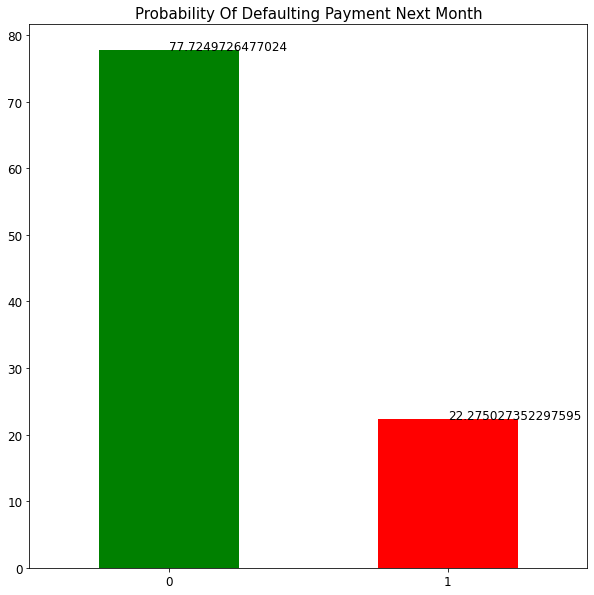

In [32]:
#Affichage des personnes qui ont un défaut et les personnes qui n'ont pas de defaut 
def_cnt = (df_new['def_pay'].value_counts(normalize=True)*100)
def_cnt.plot(kind='bar',figsize=(10,10),color=['green', 'red'])
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [33]:
#Encodage de Limit bal de tyoe object vers le type float pour pouvoir faire l histogramme
df_new['LIMIT_BAL']=df_new['LIMIT_BAL'].astype('float')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


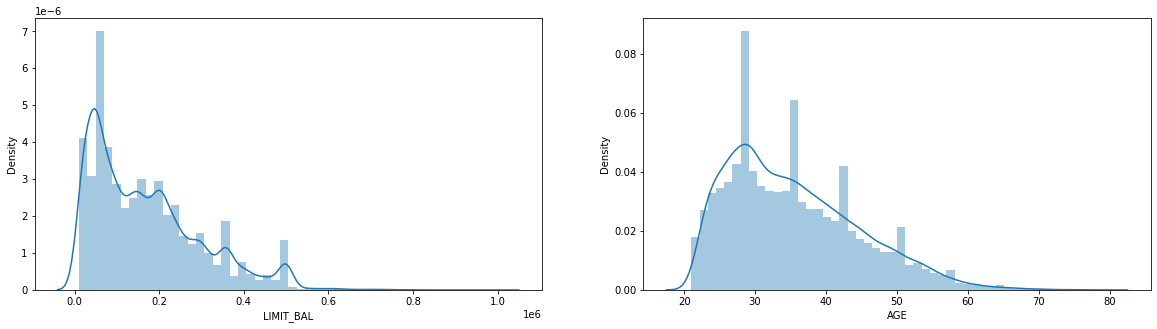

In [34]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_new.LIMIT_BAL)


plt.subplot(122)
sns.distplot(df_new.AGE)
plt.show()

In [35]:
#Une fonction de calcul de défaut de probabilité 
def corr_2_cols(Col1, Col2):
    res = df_new.groupby([Col1, Col2]).size().unstack()
    res['probabilité'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

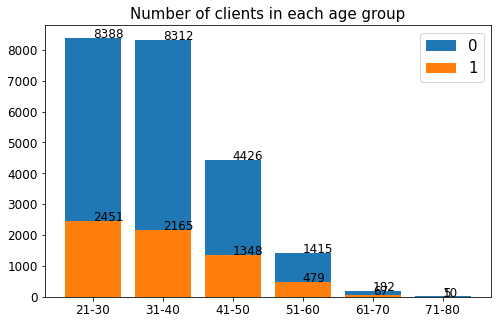

In [36]:
#Visualisation des personnes qui ont un défaut de carte selon un intervalle d'age 
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df_new['AGE_BIN'] = pd.cut(x=df_new.AGE, bins=bins, labels=names, right=True)

age_cnt = df_new.AGE_BIN.value_counts()
age_0 = (df_new.AGE_BIN[df_new['def_pay'] == 0].value_counts())
age_1 = (df_new.AGE_BIN[df_new['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=df_new, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12) #ecrire sur l axe d absscisse
plt.yticks(fontsize=12) # ecrire sur l axe des y 
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [37]:
corr_2_cols('AGE_BIN', 'def_pay')

def_pay,0,1,probabilité
AGE_BIN,,,
21-30,8388,2451,0.226128
31-40,8312,2165,0.206643
41-50,4426,1348,0.233460
51-60,1415,479,0.252904
61-70,182,67,0.269076
71-80,10,5,0.333333


In [38]:
# On les a mis dans un dataframe
gender = df_new.groupby(['SEX', 'def_pay']).size().unstack(1)
gender

def_pay,0,1
SEX,,
1,8785,2817
2,13948,3698


In [39]:
gender['probabilité'] = (gender[1]/(gender[0] + gender[1])) 
gender
#le defaut chez les hommes représente une probabilité supérieure que le defaut chez les femmes

def_pay,0,1,probabilité
SEX,,,
1,8785,2817,0.242803
2,13948,3698,0.209566


<AxesSubplot:xlabel='SEX'>

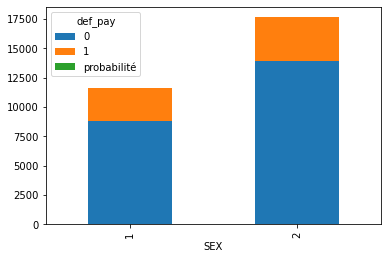

In [40]:
# Visualisation graphique de gender
gender.plot(kind='bar', stacked = True)

In [41]:
#On applique la fonction sur l 'éducation ce qui donne le tableau suivant'
corr_2_cols('EDUCATION', 'def_pay')
 


def_pay,0,1,probabilité
EDUCATION,,,
1,8490,2019,0.192121
2,10568,3283,0.237023
3,3562,1206,0.252936
4,113,7,0.058333


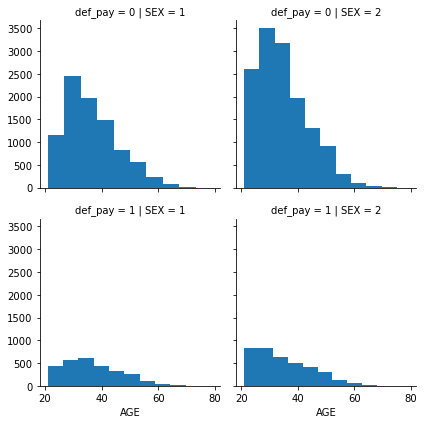

In [42]:
#Representation des defaut selon le sexe
g = sns.FacetGrid(df_new, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')
#On remarque que les hommes ont plus de défaut q

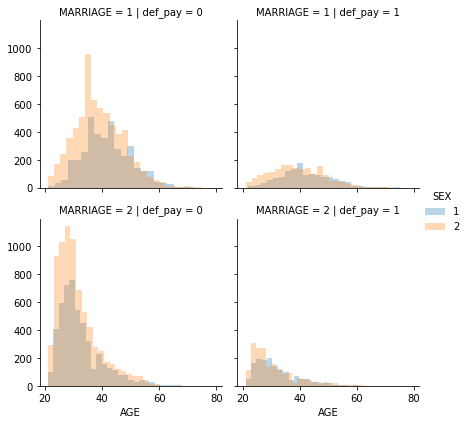

In [43]:
#Visualisation du "Marriage " en fct de defaut de payement 
g = sns.FacetGrid(df_new, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()
#On remarque que les couples mariés ont une probabilité de defaut de payement supérieure à ceux qui sont célibataires 


In [44]:
# On a combiné les 2 variables (Feature engineering)
df_new['SE_MA_2'] = 0
df_new.loc[((df_new.SEX == 1) & (df_new.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df_new.loc[((df_new.SEX == 1) & (df_new.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df_new.loc[((df_new.SEX == 2) & (df_new.MARRIAGE == 1)) , 'SE_MA_2'] = 3 #married woman
df_new.loc[((df_new.SEX == 2) & (df_new.MARRIAGE == 2)) , 'SE_MA_2'] = 4 #single woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,probabilité
SE_MA_2,,,
1,3785,1335,0.260742
2,5000,1482,0.228633
3,6489,1852,0.222036
4,7459,1846,0.198388


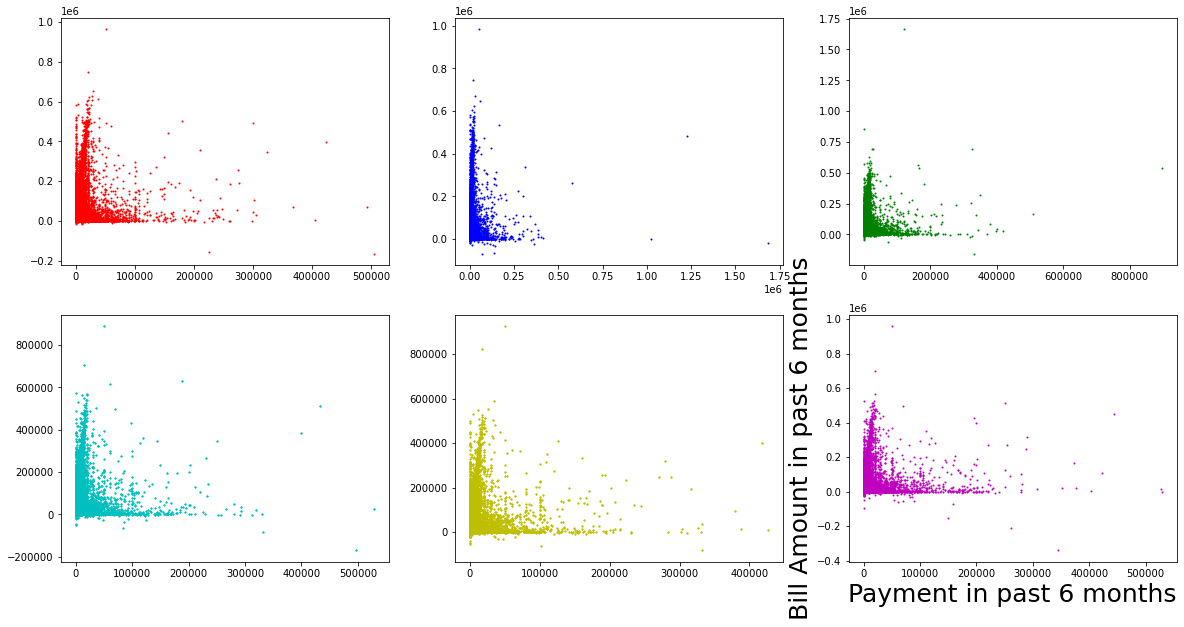

In [45]:
#Visualisation des pay AMT en fct de BILL AMT respectivement 
# plt.figure(figsize=(20,10))
colors = ['r', 'b', 'g', 'c', 'y', 'm']
fig, axs = plt.subplots(2, 3, figsize=(20,10))
for i, j, ax in zip(np.arange(1,7), colors, axs.ravel()):
#     plt.subplot(2, 3, i)
    ax.scatter(x=df_new[f'PAY_AMT{i}'], y=df_new[f'BILL_AMT{i}'], c=j, s=1)
    if i == 4:
#         plt.subplot(2, 3, i)
        ax.scatter(x=df_new[f'PAY_AMT{i}'], y=df_new[f'BILL_AMT{i}'], c=j, s=1)
        plt.ylabel("Bill Amount in past 6 months", fontsize=25)
    if i == 5:
#         plt.subplot(2, 3, i)
        ax.scatter(x=df_new[f'PAY_AMT{i}'], y=df_new[f'BILL_AMT{i}'], c=j, s=1)
        plt.xlabel("Payment in past 6 months", fontsize=25)


plt.show()

In [46]:
df_new.shape

(29248, 26)

In [47]:
df_new.shape

(29248, 26)

In [48]:
df_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN,SE_MA_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,21-30,3
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,21-30,4
3,90000.0,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,31-40,4
4,50000.0,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,31-40,3
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,51-60,1


In [49]:
df_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN,SE_MA_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,21-30,3
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,21-30,4
3,90000.0,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,31-40,4
4,50000.0,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,31-40,3
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,51-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,31-40,1
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,41-50,2
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,31-40,2


In [50]:
#One remarque que ceux qui ont une trés grande somme de credit ne presentent pas un defaut de paiement
df_new[df_new.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_0', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_0,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
ID,,,,,,,
2688,500000.0,-2,-1,367979,368199,71921,0
5688,480000.0,0,0,400000,302000,106660,0
8501,400000.0,-1,-1,405016,405016,6500,0
12331,300000.0,1,-1,324392,505000,-165580,0
25432,170000.0,0,-1,167941,304815,30860,0
28004,510000.0,-1,-1,481382,493358,71121,0
29821,400000.0,1,-1,394858,423903,396343,0
29868,340000.0,-1,0,331641,300039,44855,0
29964,610000.0,0,-1,322228,323014,348392,0


In [51]:
df=df_new

In [52]:
df[df.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_0',
     'LIMIT_BAL']].sample(30)
#Il semble que si d'ici septembre j'ai une facture trop proche de ma limite, j'échoue généralement. Cependant, On peut déjà voir quelques exceptions .

#De plus, On peux repérer certains clients qui ont rejoint notre ensemble de données un mois plus tard : ils ont 0 dans BILL et PAY AMT pendant un certain temps, puis ils commencent. 

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_0,LIMIT_BAL
ID,,,,,
8954,52996,0,54803,1,150000.0
29717,42704,3600,39892,2,50000.0
27021,0,0,0,1,280000.0
3288,12917,1300,12109,2,30000.0
15194,109604,5500,107378,2,110000.0
29484,52442,4000,51995,0,200000.0
7607,79972,3600,78651,0,90000.0
22859,39995,3800,39577,0,30000.0
8083,11283,0,11763,1,50000.0


In [53]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]
#Parfois, le client a payé mais a quand même obtenu une valeur de retard supérieure à 0

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
ID,,,,
2273,244,0,244,2
13896,950,0,1340,2
22213,702,0,802,2
22692,249,0,27231,2
23888,25000,0,26000,2
27197,1170,0,1573,2


In [54]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_0 > 0) & (df.PAY_2 >= -2))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_0', 'LIMIT_BAL', 'def_pay']].head(15)

,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT1,PAY_0,LIMIT_BAL,def_pay
ID,,,,,,,
27,-425,-2,1000,-109,1,60000.0,1
69,-9850,-2,0,-190,1,130000.0,0
110,-103,-2,0,-103,1,360000.0,0
150,-1100,-2,22500,-1100,1,260000.0,0
174,-709,-2,0,-709,1,50000.0,1
187,57077,-1,5295,2616,1,360000.0,0
217,-946,-2,0,-946,1,240000.0,1
277,2715,-1,0,171,2,460000.0,1
320,-2,-2,0,-2,1,180000.0,0


In [55]:
#On va voir ceux qui nont pas consommer pendant ces mois 
((df.PAY_0 == -2) & (df.PAY_2 == -2)& (df.PAY_3 == -2)& (df.PAY_4 == -2)& (df.PAY_5 == -2)& (df.PAY_6 == -2)).value_counts()

False    27196
True      2052
dtype: int64

In [56]:
#On peut eliminer ceux qui nont pas consommer dargent car sela naffecte pas le modele
df_new = df_new[~((df.PAY_0 == -2) & (df.PAY_2 == -2)& (df.PAY_3 == -2)& (df.PAY_4 == -2)& (df.PAY_5 == -2)& (df.PAY_6 == -2))]

In [57]:
df_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN,SE_MA_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,21-30,3
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,21-30,4
3,90000.0,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,31-40,4
4,50000.0,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,31-40,3
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,51-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,31-40,1
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,0,1837,3526,8998,129,0,0,0,41-50,2
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,19357,0,0,22000,4200,2000,3100,1,31-40,2


In [58]:
df_new.shape

(27196, 26)

## Modeling

In [59]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA_2']
y = df['def_pay'].copy() # target
y = y.astype('int')
x = df[features].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Application de l'algorithme KNN

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
#Centrage Réduction des données avec la méthode MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [236]:
from sklearn.model_selection import cross_val_score

In [237]:
#on a fait la cross validation pour eviter les erreurs, càd pour eviter de trouver un model performant a 100%
#Cross Validation evite le surapprentissage(OVERFITTING)
#On veut valider notre modèle sur le training set avant de passer sur le test set
cross_val_score(KNeighborsClassifier(4), x_train, y_train, cv=5)


array([0.79444444, 0.78910256, 0.79957265, 0.79311819, 0.78991237])

In [238]:
cross_val_score(KNeighborsClassifier(4), x_train, y_train, cv=5).mean()

0.7932300440411149

In [239]:
#On a essayé de calculer pour chacun la performance du modèle puis afficher le graphe pour identifier le meilleur K

Text(0, 0.5, 'Erreur')

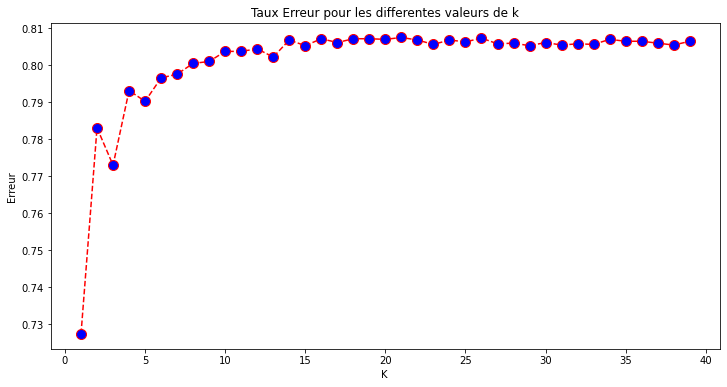

In [240]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(x_train, y_train)
    pred_i = knn_model.predict(x_test)
    error.append(knn_model.score(x_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [241]:
#On a pris la meilleur valeur du courbe(accuracy)
# K = 17
knn = KNeighborsClassifier(17)
knn_model = knn.fit(x_train, y_train) 
y_pred_knn =knn_model.predict(x_test)

In [242]:
#on s interesse au test set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.80


In [243]:
#Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[4306  252]
 [ 906  386]]


5342:(true positive) l'algorithme a predit positive et réellement elle est positive (y_predict = 1 , y_test = 1) <br>
1140:(false negative)l'algorithme a predit quelle est négative par contre elle est positive <br>
298:(false positive) l'algorithme a predit quelle est positive mais réellement elle est négative <br>
532:(true negative) l'algorithme a predit quelle est négative et elle est réellement négative <br>


In [244]:
#Affichage du rapport
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4558
           1       0.61      0.30      0.40      1292

    accuracy                           0.80      5850
   macro avg       0.72      0.62      0.64      5850
weighted avg       0.78      0.80      0.78      5850



In [ ]:
from sklearn.metrics import roc_curve, auc

#la courbe roc
from sklearn.metrics import roc_curve, auc

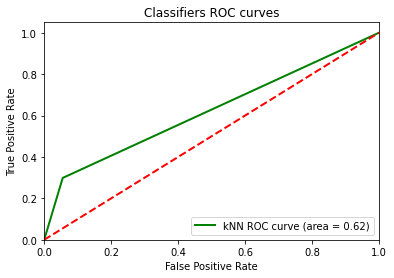

In [245]:

#la courbe roc

fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_knn)
roc_auc5 = auc(fpr2, tpr2)
plt.figure() 
plt.plot(fpr2, tpr2, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc5)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(x_train, y_train) 
#y_pred_dtc = dtc_model.predict(x_test) 

In [247]:
print('Accuracy of CART classifier on training set: {:.2f}'
    .format(dtc_model.score(x_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
          .format(dtc_model.score(x_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.61


In [248]:
#Il y a un OVERFITTING !

In [249]:
from sklearn.metrics import confusion_matrix
y_pred = dtc_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))

[[3030 1528]
 [ 754  538]]


In [250]:
# Affichage du roc entre KNN ET DECISION TREE !

In [251]:
from sklearn.metrics import roc_curve, auc

In [252]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)

fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn) #surface sous la courbe
roc_auc3 = auc(fpr3, tpr3)
y_pred_knn.shape


(5850,)

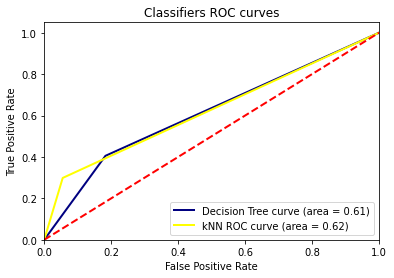

In [253]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Decision Tree curve (area = %0.2f)'% roc_auc1)

plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# Le KMN est meilleur que l'arbre de décision ( plus efficace )

In [ ]:
# SVM

In [130]:
from sklearn.svm import SVC

In [131]:
#Entrainer le modèle svm
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [132]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(x_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      6542
           1       0.32      0.70      0.44       770

    accuracy                           0.81      7312
   macro avg       0.64      0.76      0.66      7312
weighted avg       0.89      0.81      0.84      7312



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


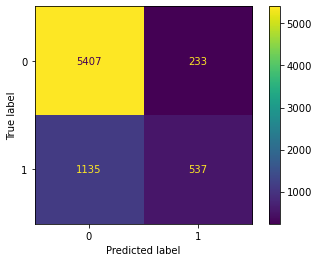

In [138]:
plot_confusion_matrix(svm,x_test,y_test)

# Noyeau linéaire

In [139]:
# Kernel linéaire
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.8105853391684902
0.8010120350109409


In [141]:
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(x_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      6785
           1       0.22      0.71      0.34       527

    accuracy                           0.80      7312
   macro avg       0.60      0.76      0.61      7312
weighted avg       0.92      0.80      0.84      7312



# Noyeau polynomial

In [142]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))


0.8186998541210795
0.8148249452954048


In [144]:
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(x_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      6598
           1       0.31      0.72      0.43       714

    accuracy                           0.81      7312
   macro avg       0.64      0.77      0.66      7312
weighted avg       0.90      0.81      0.84      7312



# Noyeau Sigmoide

In [145]:
# Kernel sigmoid
svm = SVC(kernel="sigmoid")
svm.fit(x_train, y_train)
print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.6659828592268418
0.6667122538293216


In [146]:
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(x_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      5771
           1       0.23      0.25      0.24      1541

    accuracy                           0.67      7312
   macro avg       0.51      0.51      0.51      7312
weighted avg       0.68      0.67      0.67      7312



# Comparaison of kernels

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
   'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
             'Support Vector Machines sigmoïde'],
   'Score': [s1,s2, s3, 
            s4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Support Vector Machines polynomiale,0.814825
0,Support Vector Machines RBF,0.812910
1,Support Vector Machines Linaire,0.801012
3,Support Vector Machines sigmoïde,0.666712


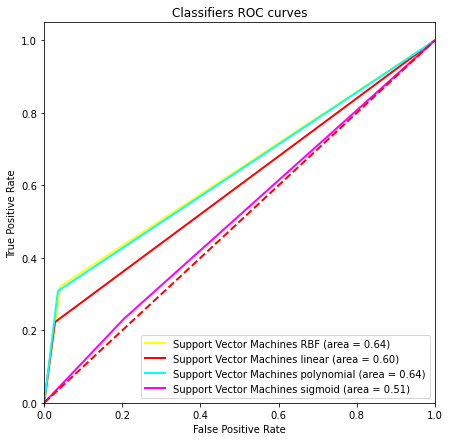

In [148]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machines RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Support Vector Machines linear (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Support Vector Machines polynomial (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support Vector Machines sigmoid (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

Le meilleur score est pour le noyau polynomial a 0.814

# Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log=LogisticRegression(random_state=5)
LogisticRegression?

In [167]:
param_grid ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.linspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100, 1000,2500]
           }
grid1=GridSearchCV(log,param_grid,cv=5)
grid1.fit(x_train,y_train)
print(grid1.best_params_)
grid1.best_score_

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
D:\Anaconda\

{'C': 0.21052631578947345, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


0.8124198957699704

In [168]:
modele_final_lr=grid1.best_estimator_

In [169]:
modele_final_lr.fit(x_train,y_train)
print(modele_final_lr.score(x_train,y_train))
print(modele_final_lr.score(x_test,y_test))

0.8116078297290367
0.808034188034188


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


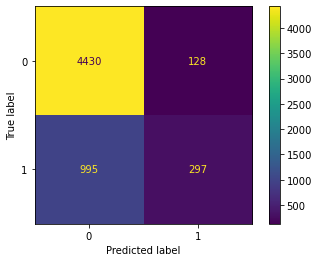

In [170]:
y_pred_rl=modele_final_lr.predict(x_test)
plot_confusion_matrix(modele_final_lr,x_test,y_test)

In [172]:
y_score_rl=modele_final_lr.predict_proba(x_test)
#print(y_score)
fpr_rl,tpr_rl,theshold=roc_curve(y_test,y_score_rl[:,1])
roc_auc_LR=auc(fpr_rl,tpr_rl)
print(classification_report(y_test,y_pred_rl,digits=6))

              precision    recall  f1-score   support

           0   0.816590  0.971918  0.887509      4558
           1   0.698824  0.229876  0.345952      1292

    accuracy                       0.808034      5850
   macro avg   0.757707  0.600897  0.616731      5850
weighted avg   0.790581  0.808034  0.767903      5850



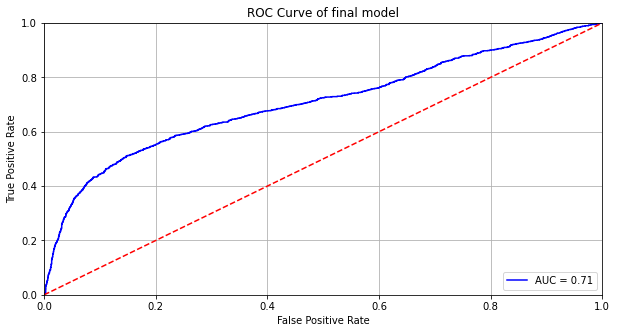

In [173]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rl, tpr_rl, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

# Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rfc=RandomForestClassifier(random_state=5)
param_grid_rfc = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [177]:
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [179]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid_rfc.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


In [181]:
modele_final_rfc=grid_rfc.best_estimator_
modele_final_rfc.fit(x_train,y_train)
print(modele_final_rfc.score(x_train,y_train))
print(modele_final_rfc.score(x_test,y_test))


0.8309684588426361
0.8198290598290598


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


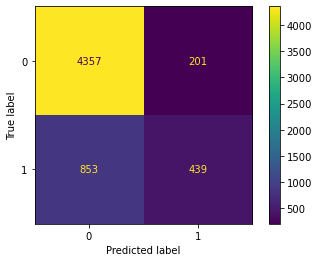

In [182]:
#Evaluate the model using accuracy and confusion matrix
y_pred_rfc=modele_final_rfc.predict(x_test)
plot_confusion_matrix(modele_final_rfc,x_test,y_test)


In [183]:
y_score_rfc=modele_final_rfc.predict_proba(x_test)
#print(y_score)
fpr_rfc,tpr_rfc,theshold=roc_curve(y_test,y_score_rfc[:,1])
roc_auc_rfc=auc(fpr_rfc,tpr_rfc)
print(classification_report(y_test,y_pred_rfc,digits=6))

              precision    recall  f1-score   support

           0   0.836276  0.955902  0.892097      4558
           1   0.685937  0.339783  0.454451      1292

    accuracy                       0.819829      5850
   macro avg   0.761107  0.647842  0.673274      5850
weighted avg   0.803073  0.819829  0.795441      5850



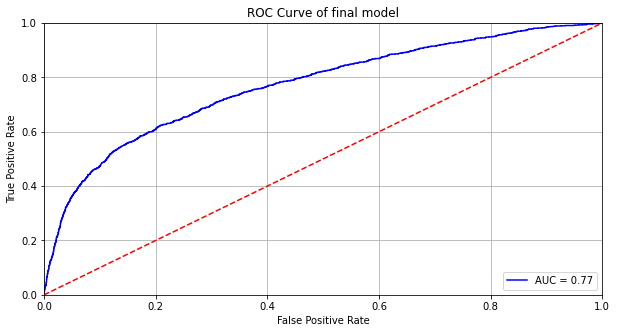

In [184]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rfc, tpr_rfc, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

# AdaBoost

In [185]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

In [186]:
#Fit, predict
model_adb = AdaBoostClassifier(n_estimators=1000,learning_rate=1)#n_estimators: Number of weak learners to train iteratively,learning_rate: It contributes to the weights of weak learners(ceoff des estimateur ayant fausse predict). It uses 1 as a default value.
model_adb.fit(x_train, y_train)
y_pred=model_adb.predict(x_test)
#adabost sere a optimiser accuracy cad corriger par chaque arbre de decision cree les fausse prediction de l arbre precedente donc boost accuracy mais on peut ameliorer score avec gridsearchcv

score entrainement= 0.8247713479784597
score test= 0.811965811965812
accuracy =  0.811965811965812


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


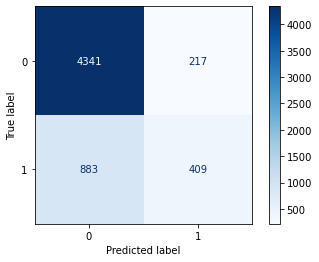

In [187]:
#Evaluate the model using accuracy and confusion matrix
print('score entrainement=',model_adb.score(x_train,y_train))
print('score test=',model_adb.score(x_test,y_test))
print('accuracy = ',accuracy_score(y_test, y_pred))
plot_confusion_matrix(model_adb, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()

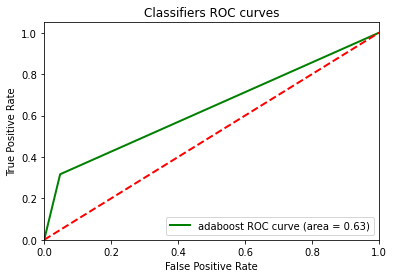

In [190]:
#la courbe roc

fpr9, tpr9, threshold9 = roc_curve(y_test, y_pred)
roc_auc9 = auc(fpr9, tpr9)
plt.figure() 
plt.plot(fpr9, tpr9, color='green', lw=2, label='adaboost ROC curve (area = %0.2f)'% roc_auc9)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()